why I build this repo, for to clarify the whole data science pipeline and play around the movie datasets when I explore the new movie by Lady Gaga, which named <a href= 'https://www.themoviedb.org/movie/332562-a-star-is-born'>'A Star Is Born'</a>.   

In [1]:
!pip install urllib3 

In [2]:
#!brew install wget --with-libressl 
#!brew reinstall wget

In [3]:
!pip install IMDbPY 

In [4]:
!pip install tmdbsimple 

In [5]:
import warnings
warnings.filterwarnings('ignore')
import torchvision
import urllib3
import requests
import imdb
import time
import itertools
import os
import tmdbsimple as tmdb
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import pickle
import sys 

In [6]:
tmdb.API_KEY = 'dd89d686e43ea64e9ed3a4f510714cbb'
movie = tmdb.Movies(332562)
response = movie.info()
movie.title

'A Star Is Born'

In [7]:
from bs4 import BeautifulSoup
url = 'https://api.themoviedb.org/3/movie/1581?api_key=dd89d686e43ea64e9ed3a4f510714cbb'
http = urllib3.PoolManager()
res = http.request('GET', url)
soup = BeautifulSoup(res.data,'lxml') 
soup 

<html><body><p>{"adult":false,"backdrop_path":"/9TP7FGdo9ppnuXX3DbB9RtzYKkh.jpg","belongs_to_collection":null,"budget":85000000,"genres":[{"id":35,"name":"Comedy"},{"id":10749,"name":"Romance"}],"homepage":"http://www.sonypictures.com/movies/theholiday/","id":1581,"imdb_id":"tt0457939","original_language":"en","original_title":"The Holiday","overview":"Two women, one (Cameron Diaz) from America and one (Kate Winslet) from Britain, swap homes at Christmastime after bad breakups with their boyfriends. Each woman finds romance with a local man (Jude Law, Jack Black) but realizes that the imminent return home may end the relationship.","popularity":11.193,"poster_path":"/ixNtpuq8OVp4IckgzkSJIflFDkw.jpg","production_companies":[{"id":735,"logo_path":null,"name":"Waverly Films","origin_country":"US"},{"id":5,"logo_path":"/71BqEFAF4V3qjjMPCpLuyJFB9A.png","name":"Columbia Pictures","origin_country":"US"},{"id":33,"logo_path":"/8lvHyhjr8oUKOOy2dKXoALWKdp0.png","name":"Universal Pictures","origi

In [8]:
import os
movie_folder='movie_file/'
if movie_folder.split('/')[0] in os.listdir('./'):
    print('Folder already exists')
else:
    os.mkdir('./'+ movie_folder) 

Folder already exists


In [9]:
movie_folder

'movie_file/'

In [10]:
import tmdbsimple as tmdb
api_key = 'dd89d686e43ea64e9ed3a4f510714cbb'
tmdb.API_KEY = api_key 
search = tmdb.Search() 

import os.path 
def grab_poster_tmdb(movie):
    res = search.movie(query=movie)
    id=res['results'][0]['id']
    movie = tmdb.Movies(id)
    posterp=movie.info()['poster_path']
    title=movie.info()['original_title']
    if os.path.isfile(movie_folder+title+'.jpg '):
        return
    url='image.tmdb.org/t/p/original'+posterp
    title='_'.join(title.split(' '))
    strcmd='wget -O '+movie_folder+title+'.jpg '+url
    os.system(strcmd) 
    
def get_movie_id_tmdb(movie):
    res = search.movie(query=movie)
    movie_id=res['results'][0]['id']
    return movie_id

def get_movie_info_tmdb(movie):
    res = search.movie(query=movie)
    id=res['results'][0]['id']
    movie = tmdb.Movies(id)
    info=movie.info()
    return info

def get_movie_genres_tmdb(movie):
    res = search.movie(query=movie)
    id=res['results'][0]['id']
    movie = tmdb.Movies(id)
    genres=movie.info()['genres']
    return genres

In [11]:
print (get_movie_genres_tmdb("A Star is born")) 

[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'name': 'Music'}, {'id': 10749, 'name': 'Romance'}]


In [12]:
get_movie_info_tmdb("A star is born").keys() 

dict_keys(['adult', 'backdrop_path', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id', 'imdb_id', 'original_language', 'original_title', 'overview', 'popularity', 'poster_path', 'production_companies', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'video', 'vote_average', 'vote_count'])

In [13]:
name=get_movie_info_tmdb("A Star is Born")
print (name['overview'])   

Seasoned musician Jackson Maine discovers—and falls in love with—struggling artist Ally. She has just about given up on her dream to make it big as a singer—until Jack coaxes her into the spotlight. But even as Ally's career takes off, the personal side of their relationship is breaking down, as Jack fights an ongoing battle with his own internal demons.


In [14]:
#Get data from imdb 
import imdb
imbd_object = imdb.IMDb() 
movie = imbd_object.search_movie('A Star is born')
print(len(movie))
movie = movie[0]
imbd_object.update(movie)
movie.keys() 

20


['title',
 'kind',
 'year',
 'cast',
 'genres',
 'runtimes',
 'countries',
 'country codes',
 'language codes',
 'color info',
 'aspect ratio',
 'sound mix',
 'certificates',
 'original air date',
 'rating',
 'votes',
 'cover url',
 'plot outline',
 'languages',
 'directors',
 'writers',
 'producers',
 'cinematographers',
 'editors',
 'editorial department',
 'casting directors',
 'production designers',
 'art directors',
 'set decorators',
 'costume designers',
 'make up department',
 'production managers',
 'assistant directors',
 'art department',
 'sound department',
 'special effects',
 'visual effects',
 'stunts',
 'camera department',
 'casting department',
 'costume departmen',
 'location management',
 'music department',
 'transportation department',
 'miscellaneous',
 'thanks',
 'akas',
 'writer',
 'director',
 'top 250 rank',
 'production companies',
 'distributors',
 'special effects companies',
 'other companies',
 'plot',
 'synopsis',
 'canonical title',
 'long imdb title

In [15]:
all_movies=tmdb.Movies()
top_movies=all_movies.popular()
top20_movies=top_movies['results'] 
print(top20_movies) 

[{'vote_count': 1613, 'id': 335983, 'video': False, 'vote_average': 6.6, 'title': 'Venom', 'popularity': 376.826, 'poster_path': '/2uNW4WbgBXL25BAbXGLnLqX71Sw.jpg', 'original_language': 'en', 'original_title': 'Venom', 'genre_ids': [878, 28, 80, 28, 27], 'backdrop_path': '/VuukZLgaCrho2Ar8Scl9HtV3yD.jpg', 'adult': False, 'overview': 'When Eddie Brock acquires the powers of a symbiote, he will have to release his alter-ego "Venom" to save his life.', 'release_date': '2018-10-03'}, {'vote_count': 248, 'id': 424139, 'video': False, 'vote_average': 6.8, 'title': 'Halloween', 'popularity': 256.554, 'poster_path': '/lNkDYKmrVem1J0aAfCnQlJOCKnT.jpg', 'original_language': 'en', 'original_title': 'Halloween', 'genre_ids': [27, 53], 'backdrop_path': '/hO1oTBGNxO5fBKVEuWnSpICJH7c.jpg', 'adult': False, 'overview': 'Laurie Strode comes to her final confrontation with Michael Myers, the masked figure who has haunted her since she narrowly escaped his killing spree on Halloween night four decades ago

In [16]:
sample_movie=top20_movies[10]
print (sample_movie)
print ("\nThe overview of the sample movie is - ", sample_movie['overview']) 

{'vote_count': 306, 'id': 369972, 'video': False, 'vote_average': 7.2, 'title': 'First Man', 'popularity': 103.122, 'poster_path': '/i91mfvFcPPlaegcbOyjGgiWfZzh.jpg', 'original_language': 'en', 'original_title': 'First Man', 'genre_ids': [36, 18], 'backdrop_path': '/z6ZANhPCcPl1HsKGjY5iZALf65V.jpg', 'adult': False, 'overview': 'A look at the life of the astronaut, Neil Armstrong, and the legendary space mission that led him to become the first man to walk on the Moon on July 20, 1969.', 'release_date': '2018-10-11'}

The overview of the sample movie is -  A look at the life of the astronaut, Neil Armstrong, and the legendary space mission that led him to become the first man to walk on the Moon on July 20, 1969.


In [17]:
for i in range(len(top20_movies)):
    movie=top20_movies[i]
    title=movie['title']
    print (title)
    if i==10:
        break 
#A star is born is rank on top 3 

Venom
Halloween
A Star Is Born
The Seven Deadly Sins: Prisoners of the Sky
Incredibles 2
Mile 22
Avengers: Infinity War
The Predator
Alpha
Ant-Man and the Wasp
First Man


In [18]:
for i in range(len(top20_movies)):
    movie=top20_movies[i]
    genres=movie['genre_ids']
    print (genres)
    if i==10:
        break 

[878, 28, 80, 28, 27]
[27, 53]
[18, 10402, 10749]
[28, 12, 14, 16]
[28, 12, 16, 10751]
[28]
[12, 878, 28, 14]
[27, 878, 28, 53]
[12, 18]
[28, 12, 878, 10749, 35, 10751]
[36, 18]


In [19]:
genres=tmdb.Genres()
list_of_genres=genres.movie_list()['genres'] 
list_of_genres

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 16, 'name': 'Animation'},
 {'id': 35, 'name': 'Comedy'},
 {'id': 80, 'name': 'Crime'},
 {'id': 99, 'name': 'Documentary'},
 {'id': 18, 'name': 'Drama'},
 {'id': 10751, 'name': 'Family'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 36, 'name': 'History'},
 {'id': 27, 'name': 'Horror'},
 {'id': 10402, 'name': 'Music'},
 {'id': 9648, 'name': 'Mystery'},
 {'id': 10749, 'name': 'Romance'},
 {'id': 878, 'name': 'Science Fiction'},
 {'id': 10770, 'name': 'TV Movie'},
 {'id': 53, 'name': 'Thriller'},
 {'id': 10752, 'name': 'War'},
 {'id': 37, 'name': 'Western'}]

In [20]:
Genre_ID_to_name={}
for i in range(len(list_of_genres)):
    genre_id=list_of_genres[i]['id']
    genre_name=list_of_genres[i]['name']
    Genre_ID_to_name[genre_id]=genre_name 

In [21]:
for i in range(len(top20_movies)):
    mov=top20_movies[i]
    title=mov['title']
    genre_ids=mov['genre_ids']
    genre_names=[]
    for id in genre_ids:
        genre_name=Genre_ID_to_name[id]
        genre_names.append(genre_name)
    print (title,genre_names)
    if i==5:
        break 

Venom ['Science Fiction', 'Action', 'Crime', 'Action', 'Horror']
Halloween ['Horror', 'Thriller']
A Star Is Born ['Drama', 'Music', 'Romance']
The Seven Deadly Sins: Prisoners of the Sky ['Action', 'Adventure', 'Fantasy', 'Animation']
Incredibles 2 ['Action', 'Adventure', 'Animation', 'Family']
Mile 22 ['Action']


In [22]:
all_movies=tmdb.Movies()
top_movies=all_movies.popular()
len(top_movies['results'])
top20_movies=top_movies['results'] 

In [23]:
all_movies=tmdb.Movies()
top1000_movies=[]
print('Pulling movie list, Please wait...')
for i in range(1,51):
    if i%15==0:
        time.sleep(7)
    movies_on_this_page=all_movies.popular(page=i)['results']
    top1000_movies.extend(movies_on_this_page)
len(top1000_movies)
f1=open('movie_list.pckl','wb')
pickle.dump(top1000_movies,f1)
f1.close()
print('Done!') 

Pulling movie list, Please wait...
Done!


In [24]:
f1=open('movie_list.pckl','rb')
top1000_movies=pickle.load(f1)
f1.close() 

In [25]:
def list2pairs(j):
    pairs = list(itertools.combinations(j, 2))
    for i in j:
        pairs.append([i,i])
    return pairs 

In [26]:
allPairs = []
for movie in top1000_movies:
    allPairs.extend(list2pairs(movie['genre_ids']))
    
nr_ids = np.unique(allPairs)
visGrid = np.zeros((len(nr_ids), len(nr_ids)))
for p in allPairs:
    visGrid[np.argwhere(nr_ids==p[0]), 
            np.argwhere(nr_ids==p[1])]+=1
    if p[1] != p[0]:
        visGrid[np.argwhere(nr_ids==p[1]), 
                np.argwhere(nr_ids==p[0])]+=1 

In [27]:
print (visGrid.shape)
print (len(Genre_ID_to_name.keys()))  

(19, 19)
19


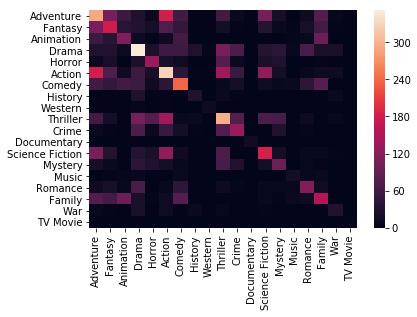

In [28]:
annot_lookup = []

for i in range(len(nr_ids)):
    annot_lookup.append(Genre_ID_to_name[nr_ids[i]])
sns.heatmap(visGrid, 
            xticklabels=annot_lookup, 
            yticklabels=annot_lookup)  

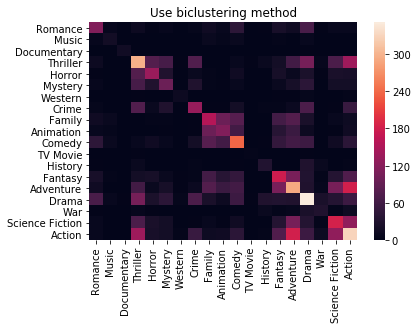

In [29]:
from sklearn.cluster import SpectralCoclustering 
model = SpectralCoclustering(n_clusters=8)
model.fit(visGrid)

fit_data = visGrid[np.argsort(model.row_labels_)]
fit_data = fit_data[:, np.argsort(model.column_labels_)]

annot_lookup_sorted = []
for i in np.argsort(model.row_labels_):
    annot_lookup_sorted.append(Genre_ID_to_name[nr_ids[i]])
    
sns.heatmap(fit_data, 
            xticklabels=annot_lookup_sorted, 
            yticklabels=annot_lookup_sorted, 
            annot=False)
plt.title("Use biclustering method")
plt.show()  

Build deep learning model 